In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('/content/emails.csv')
df=df.drop('Email No.', axis=1)
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.isnull().sum()

,0
the,0
to,0
ect,0
and,0
for,0
...,...
military,0
allowing,0
ff,0
dry,0


In [5]:
X = df.drop('Prediction', axis=1)
y = df['Prediction']

In [29]:
from sklearn.preprocessing import scale
X = scale(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **KNN Classification**

k-NN is a distance-based algorithm that relies on measuring the distance between data points to find the nearest neighbors.


Cross-validation with 5 folds is a technique used to assess a model’s generalization performance more robustly by training and validating it across multiple subsets of the data.

**In 5-fold cross-validation:**

1. The dataset is randomly split into 5 equal (or nearly equal) parts, or folds.
2. The model is trained on 4 folds and validated on the remaining 1 fold.
3. This process is repeated 5 times, with each fold serving as the validation set once, and the remaining 4 folds as the training set.
4. The model’s overall performance is evaluated by averaging the accuracy (or another metric) across these 5 validation results.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': [3,5,7,9,11,13,15]}
knn = KNeighborsClassifier()

# using 5 fold cross-validation for grid search
grid_search = GridSearchCV(knn, param_grid, cv = 5)
grid_search.fit(X_train,y_train)

best_knn = grid_search.best_estimator_
bestk = grid_search.best_params_['n_neighbors']

Hyperparameter Tuning: k-NN’s performance is sensitive to the choice of k (the number of neighbors) and other parameters. Using 5-fold cross-validation helps select the optimal value of k by evaluating performance across folds, ensuring it generalizes well instead of just fitting one training subset.

In [26]:
# knn = KNeighborsClassifier(n_neighbors=7)
# knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [8]:
knn_preds = best_knn.predict(X_test)
knn_preds

array([0, 0, 1, ..., 0, 0, 0])

In [9]:
print("Accuracy =",accuracy_score(y_test, knn_preds)*100,"%")

Accuracy = 87.62886597938144 %


<Axes: >

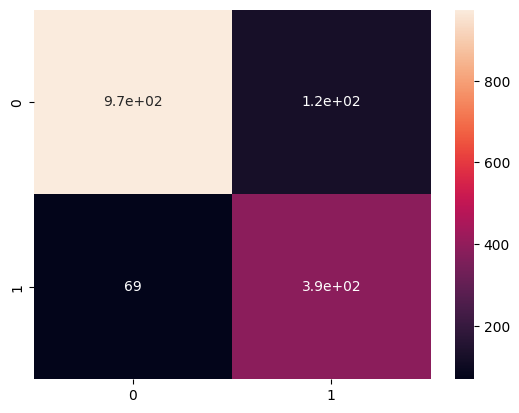

In [10]:
sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True)

# **SVM Classifier**

USE SCALED X FOR TRAINING AND TESTING WITH SVC.

Features with larger scales can disproportionately influence the position of the hyperplane, leading to suboptimal decision boundaries if data is unscaled.
Scaling ensures all features contribute equally, making it easier for SVM to find an optimal hyperplane. Therefore, scaling typically improves SVM's accuracy.

In [31]:
model = SVC(C=1)
model.fit(X_train, y_train)

SVC(C=1)

In [32]:
svc_preds = model.predict(X_test)
svc_preds

array([0, 0, 1, ..., 0, 0, 1])

In [33]:
print("Accuracy =",accuracy_score(y_test, svc_preds)*100,"%")

Accuracy = 93.81443298969072 %


<Axes: >

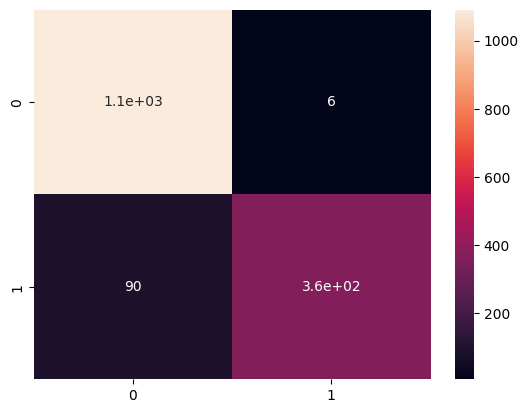

In [34]:
sns.heatmap(confusion_matrix(y_test, svc_preds), annot=True)

- SVM tries to find a hyperplane that maximizes the margin between classes. This margin is sensitive to the scale of the features.

- In its most simple type, SVM doesn't support multiclass classification natively. It supports binary classification and separating data points into two classes. For multiclass classification, the same principle is utilized after breaking down the multiclassification problem into multiple binary classification problems.